## Multiple Access Channel Demo

Author: Cheuk Ting Li  
Based on El Gamal and Kim, _Network Information Theory_, Ch. 4

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")  # Set linear programming solver
PsiOpts.setting(repr_latex = True)      # Turn on Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)      # Turn on LaTeX in diagrams

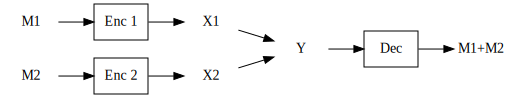

In [2]:
X1, X2 = rv_array("X", 1, 3)
Y = rv("Y")
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()                   # Define multiple access channel
model.set_rate(M1, R1)                  # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_node(M1, X1, label = "Enc 1") # Encoder 1 maps M1 to X1
model.add_node(M2, X2, label = "Enc 2") # Encoder 2 maps M2 to X2
model.add_edge(X1+X2, Y)                # Channel X1,X2 -> Y
model.add_node(Y, M1+M2, label = "Dec") # Decoder maps Y1,Y2 to M1,M2

model.graph()                           # Draw diagram

In [3]:
r = model.get_inner()  # Automatic inner bound
r

( ( R1 >= 0 )
 &( R2 >= 0 )
 &( R1 <= I(X1&Y|Q_T+X2) )
 &( R2 <= I(X2&Y|Q_T+X1) )
 &( R1+R2 <= I(X2+X1&Y|Q_T) )
 &( markov(X2, Q_T, X1) )
 &( markov(Q_T, X2+X1, Y) ) ).exists(Q_T)

In [4]:
r_out = model.get_outer()  # Automatic outer bound
bool(r_out >> r)           # Converse proof

True

### References
-  R. Ahlswede, "Multi-way communication channels," in 2nd Int. Symp. Inform. Theory, Tsahkadsor, Armenian SSR, 1971, pp. 23–52.
- H. Liao, "Multiple access channels," Ph.D. dissertation, University of Hawaii, Honolulu, HI, 1972.
- R. Ahlswede, "The capacity region of a channel with two senders and two receivers," The annals of probability, vol. 2, no. 5, pp. 805–814, 1974
